In [43]:
import  pandas as pd
import numpy as np
import netCDF4
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
nc = netCDF4.Dataset("chicago.nc", 'r')
nc.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 't2m', 'msl', 'sp', 'tp'])

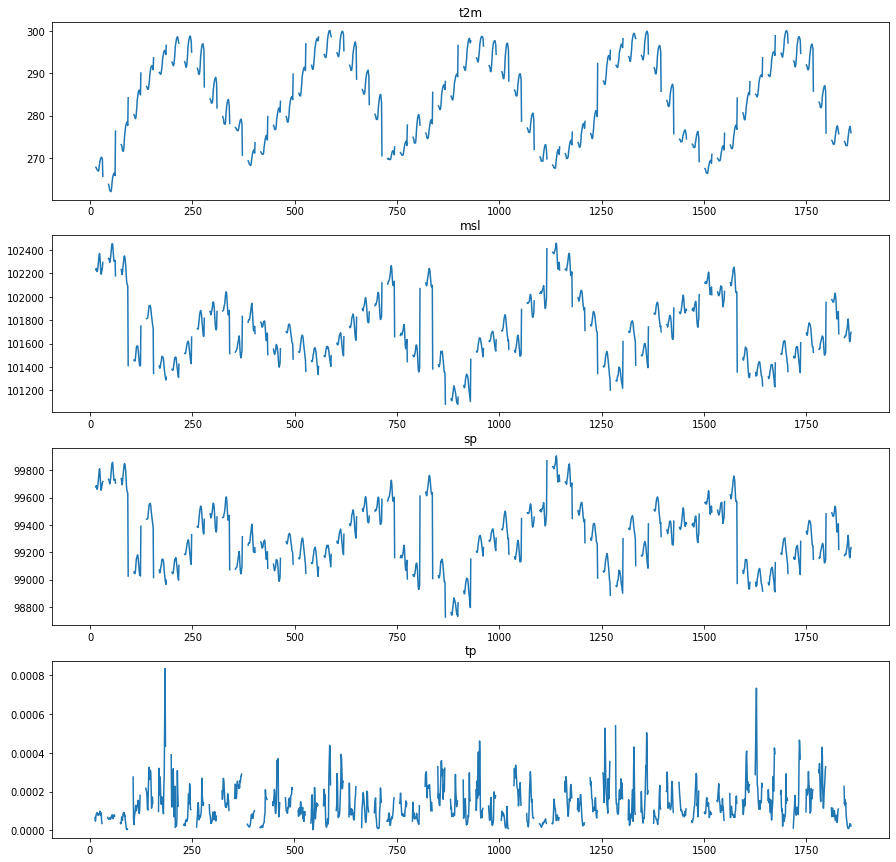

In [45]:
features = ['t2m', 'msl', 'sp', 'tp']

fig, axs = plt.subplots(4, 1, figsize=(15, 15))

for i, feature in enumerate(features):
    f_arr = nc.variables[feature][:]
    f_arr = np.mean(np.mean(f_arr, axis=2), axis=1)
    axs[i].plot(range(len(f_arr)), f_arr)
    axs[i].set_title(feature)
    
plt.show()

In [46]:

feature_list = []
for f in features:
    f_arr = nc.variables[f][:] 
    f_arr = np.mean(np.mean(f_arr, axis=2), axis=1)

    #interpolate
    mask = f_arr.mask
    x = np.argwhere(mask).flatten()
    xp = np.argwhere(~mask).flatten()
    fp = f_arr[~mask]

    interpolated = np.interp(x, xp, fp)
    interp_arr = f_arr.copy()
    interp_arr[mask] = interpolated
    
    
    feature_list.append(interp_arr)

feature_arr = np.stack(feature_list, axis=1)

time_arr = np.array(nc.variables['time'][:], np.int)
fun = np.vectorize(lambda x: pd.to_datetime('1900-01-01') + pd.DateOffset(hours=int(x)))
in_date_range = pd.to_datetime(fun(time_arr))

weather_data = pd.DataFrame(feature_arr, columns=features, index=in_date_range)
weather_data = weather_data.loc[sorted(weather_data.index)]
weather_data["t2m"] = weather_data["t2m"] - 273

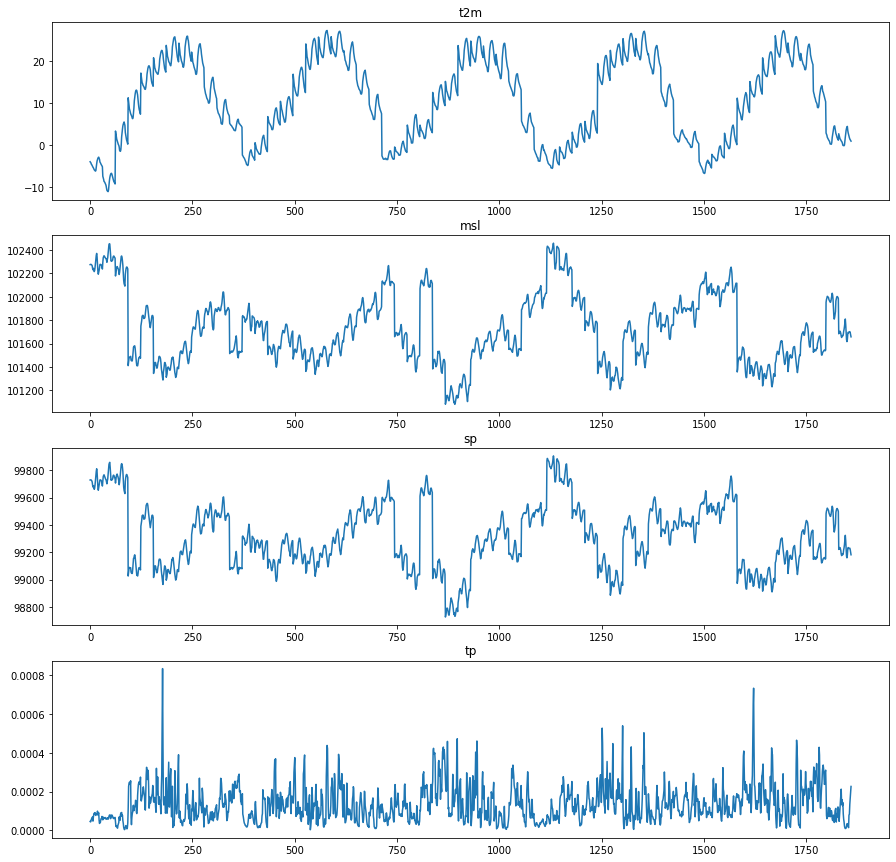

In [47]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15))
for i, feature in enumerate(features):
    f_arr = weather_data[feature]
    axs[i].plot(range(len(f_arr)), f_arr)
    axs[i].set_title(feature)


In [48]:
weather_data.to_csv("chicago_weather.csv")